<a href="https://colab.research.google.com/github/BrandonKTC/Pytorch_Deep_learning/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision

In [1]:
# Import Pytorch
import torch
from torch import nn

import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np

print(torch.__version__)

1.12.0+cu113


## Getting a dataset

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(root="data",
                                  download=True,
                                   train=True,
                                   transform=ToTensor(),
                                   target_transform=None)
test_data = datasets.FashionMNIST(root="data",
                                  download=True,
                                  train=False,
                                  transform=ToTensor(),
                                  target_transform=None)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## Visualizing the data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Sneaker')

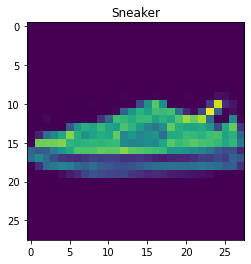

In [4]:
rand_idx = np.random.randint(0, len(train_data))
image, label = train_data[rand_idx]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label])

## Prepare DataLoader

In [5]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# Turn datasets into iterable
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)


## Model 0: Build a baseline model

In [6]:
class FashionMNISTModelVO(nn.Module):
  def __init__(self,
               input_shape,
               hidden_units,
               output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape, hidden_units),
        nn.Linear(hidden_units, output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [7]:
model_0 = FashionMNISTModelVO(784, 10, len(class_names))
model_0(torch.rand([1, 1, 28, 28]))

tensor([[-0.0704,  0.4373,  0.5367,  0.0189,  0.3299,  0.0950,  0.5179, -0.0027,
          0.2073, -0.1403]], grad_fn=<AddmmBackward0>)

In [8]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [9]:
!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py
from helper_functions import accuracy_fn

--2022-07-16 06:01:32--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9569 (9.3K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.34K  --.-KB/s    in 0s      

2022-07-16 06:01:32 (75.8 MB/s) - ‘helper_functions.py’ saved [9569/9569]



In [10]:
torch.manual_seed(42)

epochs = 3

for epoch in range(epochs):
  print(f"Epoch {epoch}\n --------------------- ")
  train_loss, train_acc = 0, 0
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward
    y_pred = model_0(X)
    #  Loss / Acc
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y, y_pred.argmax(dim=1))
    # optimizer
    optimizer.zero_grad()
    # loss
    loss.backward()
    # optimizer
    optimizer.step()
    ## Printing
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples. ")
  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # Forward
      test_pred = model_0(X_test)
      # Loss / Acc
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  # Printing
  print(f"\n Loss: {train_loss:.4f} | accuracy: {train_acc:.2f}% | Test_loss: {test_loss:.4f} | Test_acc: {test_acc:.2f}%\n")

Epoch 0
 --------------------- 
Looked at 0/60000 samples. 
Looked at 12800/60000 samples. 
Looked at 25600/60000 samples. 
Looked at 38400/60000 samples. 
Looked at 51200/60000 samples. 

 Loss: 0.8911 | accuracy: 70.56% | Test_loss: 0.6285 | Test_acc: 78.28%

Epoch 1
 --------------------- 
Looked at 0/60000 samples. 
Looked at 12800/60000 samples. 
Looked at 25600/60000 samples. 
Looked at 38400/60000 samples. 
Looked at 51200/60000 samples. 

 Loss: 0.5585 | accuracy: 80.99% | Test_loss: 0.5442 | Test_acc: 80.99%

Epoch 2
 --------------------- 
Looked at 0/60000 samples. 
Looked at 12800/60000 samples. 
Looked at 25600/60000 samples. 
Looked at 38400/60000 samples. 
Looked at 51200/60000 samples. 

 Loss: 0.5031 | accuracy: 82.74% | Test_loss: 0.5136 | Test_acc: 81.92%



In [11]:
torch.manual_seed(42)

def eval_model(model, data_loader, loss_fn, accuracy_fn):
  """
  Returns a dictionary containing the results of model predictions on data_loader
  """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      y_pred = model(X)
      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim=1))

    # Scale loss and acc to find the avg per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model_0,
                             test_dataloader,
                             loss_fn,
                             accuracy_fn)
model_0_results

{'model_acc': 81.91892971246007,
 'model_loss': 0.5136163234710693,
 'model_name': 'FashionMNISTModelVO'}

In [12]:
device = "cuda" if torch.cuda.is_available else "cpu"

## Model 1: Building a better model with non-linearity

In [13]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_features, output_features, hidden_layer):
    super().__init__()
    self.non_linear = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_features, hidden_layer),
        nn.ReLU(),
        nn.Linear(hidden_layer, output_features),
        nn.ReLU()
    )
  
  def forward(self, x):
    return self.non_linear(x)


In [14]:
model_1 = FashionMNISTModelV1(784, 10, len(class_names)).to(device)
model_1(torch.rand([1, 28, 28]).to(device))

tensor([[0.3409, 0.1293, 0.1929, 0.0403, 0.1608, 0.1178, 0.0000, 0.0000, 0.0000,
         0.1699]], device='cuda:0', grad_fn=<ReluBackward0>)

In [15]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr=0.01)

In [16]:
def train(data_loader, model, loss_fn, accuracy_fn, optimizer):
  train_loss, train_acc = 0, 0
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
  ## Training
    model_1.train()
    # Forward
    y_pred = model(X)
    # loss / acc
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y, y_pred.argmax(dim=1))
    # optimizer
    optimizer.zero_grad()
    # loss
    loss.backward()
    # optimizer
    optimizer.step()
    # printing
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(data_loader.dataset)} samples.")
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train_loss: {train_loss:.4f} | Train_acc: {train_acc:.2f}%")

def test(data_loader, model, loss_fn, accuracy_fn):
  test_loss, test_acc = 0, 0
  with torch.inference_mode():
    ## Testing
    model_1.eval()
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      # Forward
      test_pred = model(X)
      # Loss / Acc
      loss = loss_fn(test_pred, y)
      test_loss += loss
      test_acc += accuracy_fn(y, test_pred.argmax(dim=1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test_loss: {test_loss:.4f} | Test_acc: {test_acc:.2f}%\n")

In [18]:
%%time
torch.manual_seed(42)

epochs = 3

for epoch in range(epochs):
  print(f"Epoch {epoch}\n ------------------ ")
  train(train_dataloader, model=model_1,loss_fn=loss_fn, accuracy_fn=accuracy_fn, optimizer=optimizer)
  test(test_dataloader, model=model_1,loss_fn=loss_fn, accuracy_fn=accuracy_fn)


Epoch 0
 ------------------ 
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train_loss: 1.6675 | Train_acc: 43.58%
Test_loss: 1.2083 | Test_acc: 58.62%

Epoch 1
 ------------------ 
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train_loss: 0.9434 | Train_acc: 69.15%
Test_loss: 0.8363 | Test_acc: 71.81%

Epoch 2
 ------------------ 
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train_loss: 0.7723 | Train_acc: 73.77%
Test_loss: 0.7654 | Test_acc: 73.10%

CPU times: user 22.8 s, sys: 289 ms, total: 23.1 s
Wall time: 23.8 s


In [19]:
def eval_model(model, data_loader, loss_fn, accuracy_fn, device):
  """
  Returns a dictionary containing the results of model predictions on data_loader
  """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim=1))

    # Scale loss and acc to find the avg per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

In [20]:
model_1_results = eval_model(model_1,
                             test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

{'model_acc': 73.10303514376997,
 'model_loss': 0.7653749585151672,
 'model_name': 'FashionMNISTModelV1'}

## Model 2: Building a Convontional Neural Network

In [69]:
device = "cuda" if torch.cuda.is_available() else "cpu"

class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_layer, hidden_layer, output_layer):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_layer, out_channels=hidden_layer, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_layer, out_channels=hidden_layer, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_layer, out_channels=hidden_layer, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_layer, out_channels=hidden_layer, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(hidden_layer*7*7,
                  output_layer)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x

model_2 = FashionMNISTModelV2(1, 10, len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [70]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr=0.01)

In [72]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 3

for epoch in range(epochs):
  print(f"Epoch {epoch}\n -----------------")
  train(train_dataloader, model_2, loss_fn=loss_fn, accuracy_fn=accuracy_fn, optimizer=optimizer)
  test(test_dataloader, model_2, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

Epoch 0
 -----------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train_loss: 0.4186 | Train_acc: 85.03%
Test_loss: 0.4143 | Test_acc: 85.42%

Epoch 1
 -----------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train_loss: 0.3907 | Train_acc: 86.03%
Test_loss: 0.3939 | Test_acc: 86.03%

Epoch 2
 -----------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train_loss: 0.3702 | Train_acc: 86.77%
Test_loss: 0.3788 | Test_acc: 86.68%



In [73]:
model_2_results = eval_model(model_2, test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)
model_2_results

{'model_acc': 86.68130990415335,
 'model_loss': 0.37880614399909973,
 'model_name': 'FashionMNISTModelV2'}

In [74]:
import pandas as pd

compare_results = pd.DataFrame({"baseline_model_cpu": model_0_results,
                                "baseline_model_gpu": model_1_results,
                                "conv_model": model_2_results})
compare_results = compare_results.T

In [75]:
compare_results

,model_name,model_loss,model_acc
baseline_model_cpu,FashionMNISTModelVO,0.513616,81.91893
baseline_model_gpu,FashionMNISTModelV1,0.765375,73.103035
conv_model,FashionMNISTModelV2,0.378806,86.68131


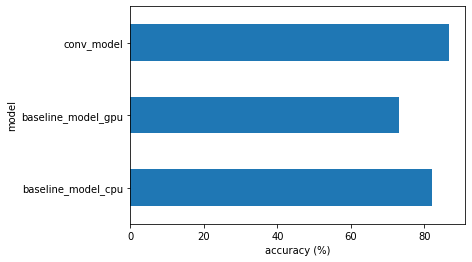

In [76]:
compare_results["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");